In [44]:
# M Gopi Chandu

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mnist-digit-recognizer/train.csv


In [2]:
df = pd.read_csv('/kaggle/input/mnist-digit-recognizer/train.csv')

In [3]:
df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
19830,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31481,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18407,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7834,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38248,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
import matplotlib.pyplot as plt

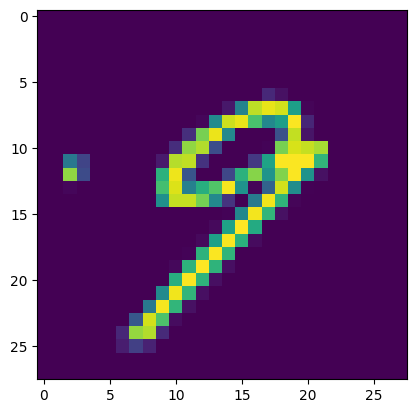

In [8]:
plt.imshow(df.iloc[26287,1:].values.reshape(28,28))

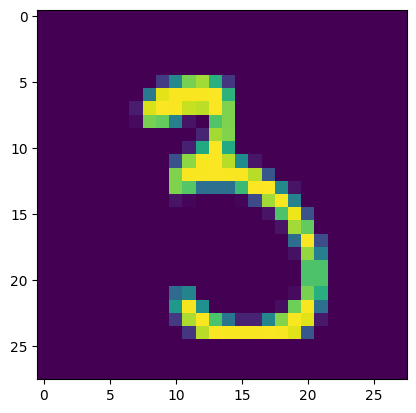

In [9]:
plt.imshow(df.iloc[29998,1:].values.reshape(28,28))

In [10]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
X_train.shape

(33600, 784)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [17]:
result = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
result

,Actual,Predicted
5457,8,8
38509,1,1
25536,9,9
31803,9,9
39863,8,8
...,...,...
8388,4,4
29359,9,9
40276,3,3
18421,0,0


# Reducing the Dimensions for better performance using Priciple Component Analysis (PCA)

In [21]:
#Step1: Centering the mean using standardization technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
#Step2 : Reducing the dimensions using PCA
from sklearn.decomposition import PCA
for i in range(1,785,100):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    knn=KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred = knn.predict(X_test_trf)
    print(f"For PCA's = {i} accuracy score = {accuracy_score(y_test,y_pred)}")
    i+=100
    



For PCA's = 1 accuracy score = 0.25976190476190475
For PCA's = 101 accuracy score = 0.9534523809523809
For PCA's = 201 accuracy score = 0.9513095238095238
For PCA's = 301 accuracy score = 0.9463095238095238
For PCA's = 401 accuracy score = 0.9435714285714286
For PCA's = 501 accuracy score = 0.9411904761904762
For PCA's = 601 accuracy score = 0.9398809523809524
For PCA's = 701 accuracy score = 0.9391666666666667


Threfore the optinum number of priciple components are 101 from 101 the accuracy is droping.

In [32]:
pca = PCA(n_components=101)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [33]:
X_train_trf,X_train_trf.shape

(array([[-2.71863124, -0.48982659,  1.13548631, ...,  0.5411492 ,
          1.53309624,  1.69681353],
        [-0.67697862, -6.7536243 , -2.33589044, ...,  0.83696835,
         -0.45314634,  0.42567727],
        [-3.03323522,  6.50981435,  7.49182864, ...,  2.17419238,
         -1.41900983,  0.87423911],
        ...,
        [ 2.14883758,  0.78080613, -0.74737694, ...,  1.50467189,
         -0.98804782, -0.31557254],
        [ 1.05956941,  0.94766469,  3.94972954, ..., -0.60647423,
         -1.52247279, -0.02300828],
        [17.7025805 ,  1.9618635 , -4.94353895, ...,  0.46740797,
          1.39446792, -0.94140502]]),
 (33600, 101))

In [39]:
knn = KNeighborsClassifier()
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [41]:
y_pred = knn.predict(X_test_trf)

In [42]:
accuracy_score(y_test,y_pred)

0.9534523809523809

In [43]:
result_trf = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
result_trf

,Actual,Predicted
5457,8,8
38509,1,1
25536,9,9
31803,9,7
39863,8,8
...,...,...
8388,4,4
29359,9,9
40276,3,3
18421,0,0
